## Glass classification
### Abstract: From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)
Data Set Information:

Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis. BEAGLE is a product available through VRS Consulting, Inc.; 4676 Admiralty Way, Suite 206; Marina Del Ray, CA 90292 (213) 827-7890 and FAX: -3189. In determining whether the glass was a type of "float" glass or not, the following results were obtained (# incorrect answers):

Type of Sample -- Beagle -- NN -- DA
Windows that were float processed (87) -- 10 -- 12 -- 21
Windows that were not: (76) -- 19 -- 16 -- 22

The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

In [1]:
#First of all, we need to import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import normalize
from scipy.stats import norm
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")

glass = pd.read_csv(target_url, header=None, prefix="V")
glass.columns = ["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#print statistical description(summary information) of dataset
glass.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
#Missing values
glass.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

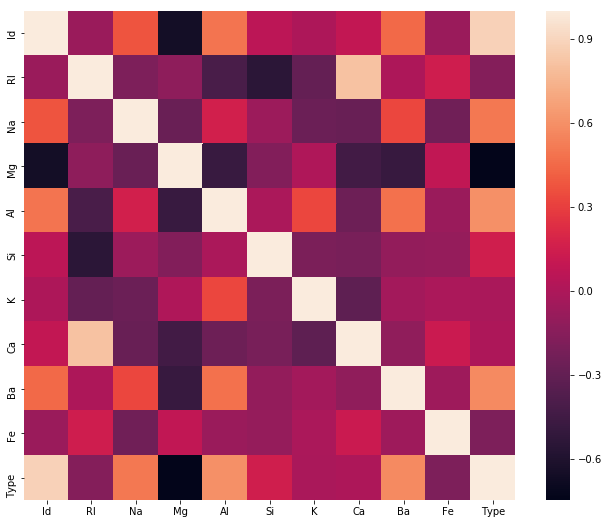

In [6]:
#Creating heatmap to understand correlations between variables
corr = glass.corr(method='pearson')
plt.subplots(figsize=(11,9))
sns.heatmap(corr)

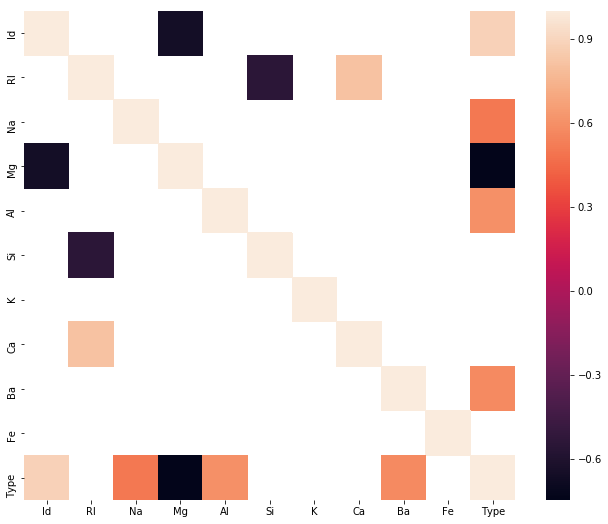

In [7]:
#The same heatmap with only strong correlations
plt.subplots(figsize=(11,9))
sns.heatmap(corr[abs(corr) > 0.5 ])

In [8]:
corr[abs(corr) > 0.5 ]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,1.000000,NaN,NaN,-0.650328,NaN,NaN,NaN,NaN,NaN,NaN,0.877357
RI,NaN,1.000000,NaN,NaN,NaN,-0.542052,NaN,0.810403,NaN,NaN,NaN
Na,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502898
Mg,-0.650328,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.744993
Al,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.598829
Si,NaN,-0.542052,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Ca,NaN,0.810403,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.575161
Fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


> **We can conclude that there are a few strong correlations:**
    * RI and Ca and Si
    * Type and Na,Mg,Al,Ba

In [6]:
glass.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

,skewness,variables
0,0.000000,Id
2,0.450992,Na
5,0.725317,Si
4,0.900918,Al
10,1.107085,Type
3,1.144465,Mg
1,1.614015,RI
9,1.742007,Fe
7,2.032677,Ca
8,3.392431,Ba


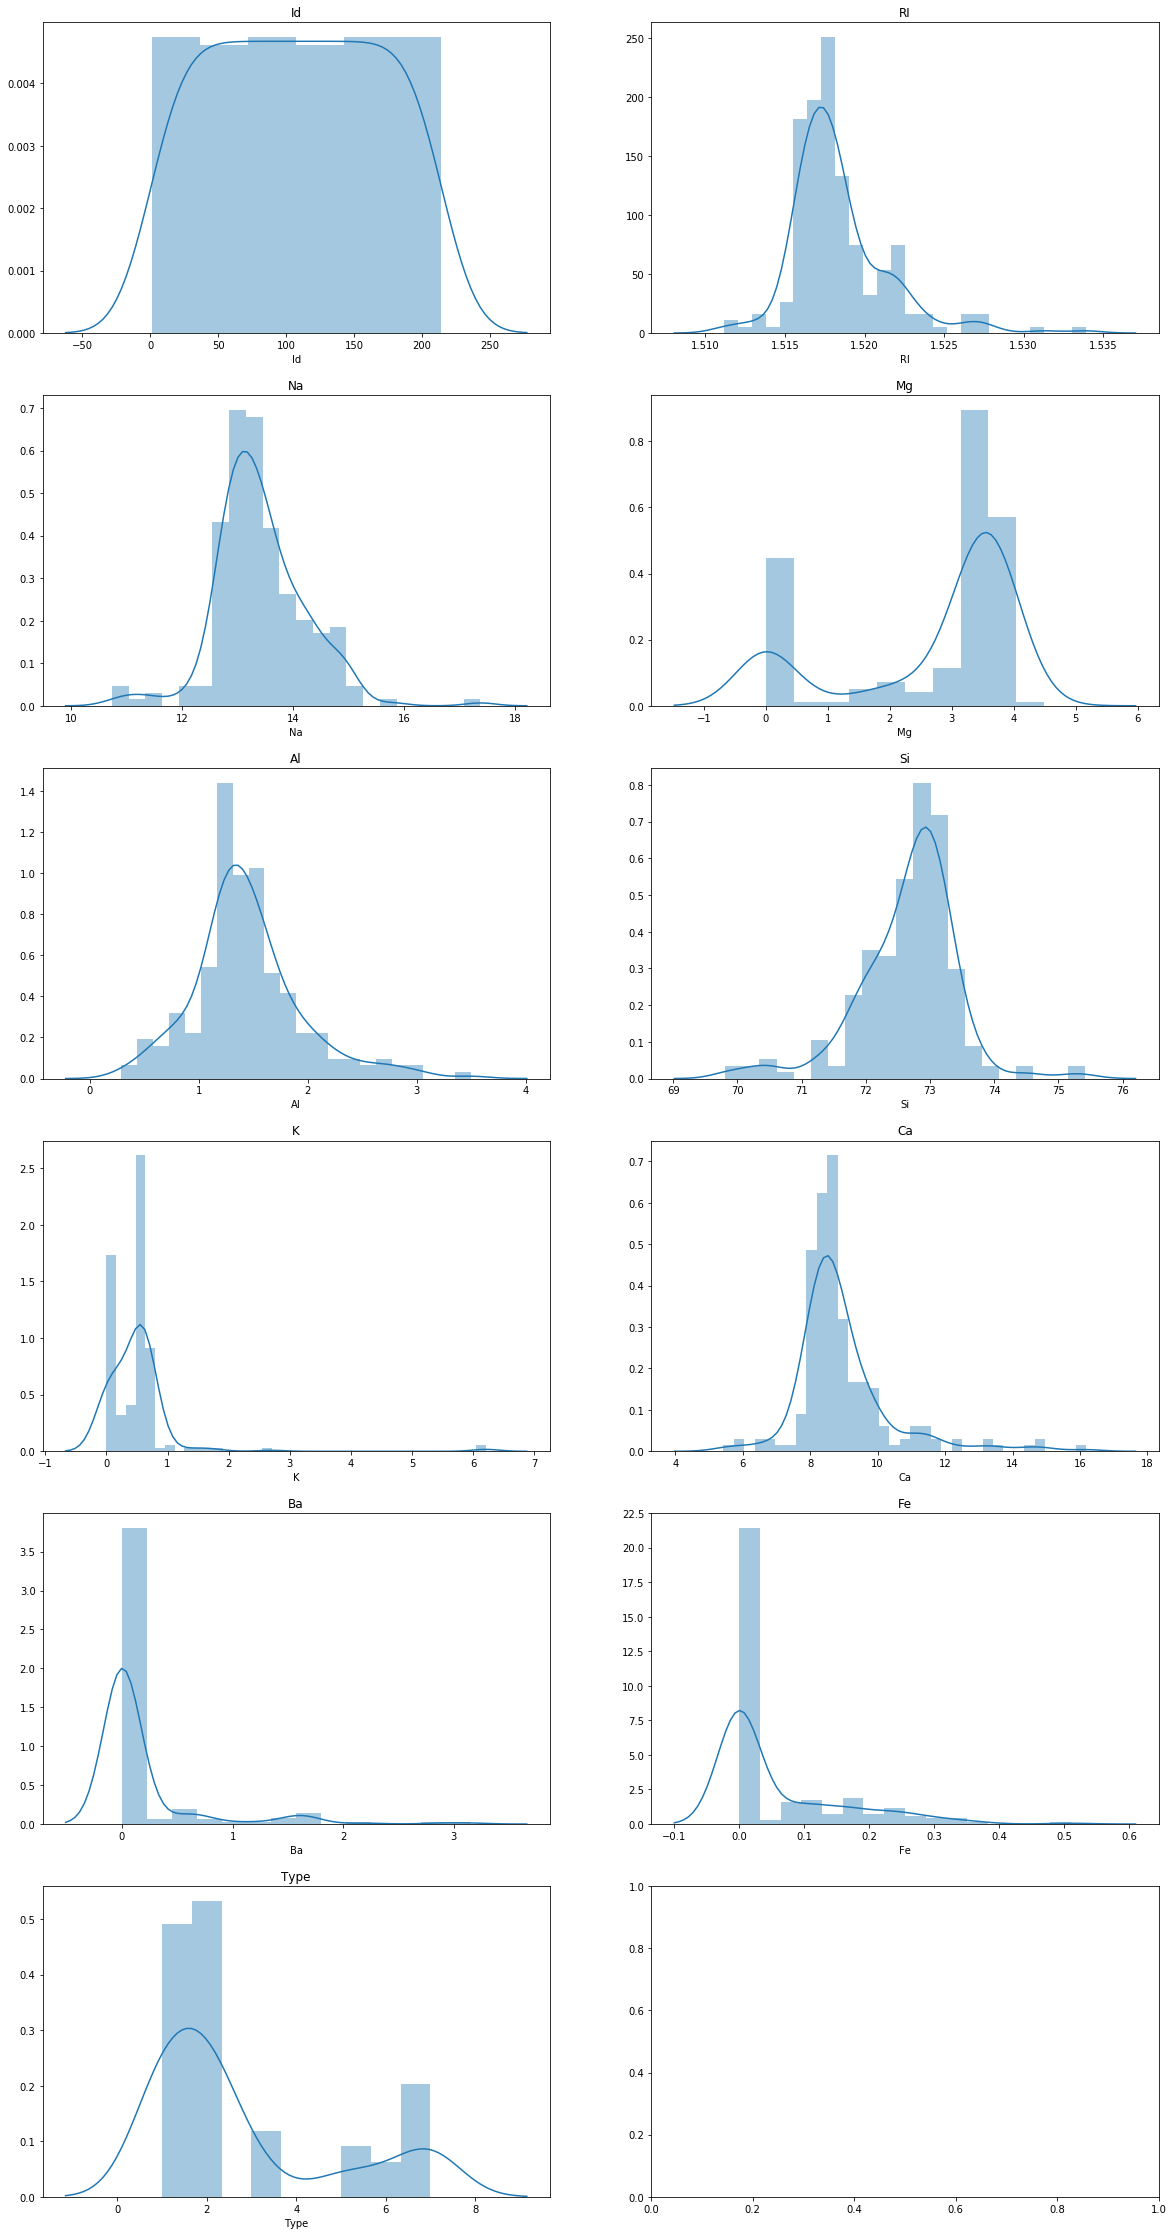

In [103]:
#Histograms of distributions for all variables    
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(20,40))
for i, ax in enumerate(axes.flatten()):
    if i == len(glass.columns):
        break
    sns.distplot(glass.iloc[:,i], ax=ax)
    ax.set_title(glass.columns[i])
    
#Calculate skewness
skness = skew(glass)
skw = pd.DataFrame({'variables': glass.columns, 'skewness': abs(skness)})
skw.sort_values('skewness')

> According to the results we can say that **Na, Al, Si** have a normal distributions.
> <p> ** K, Ba, Ca, Fe, RI, Mg** have an abnormal distributions, some skewness.</p>

### What transformation can we do with variables that have skewness for improving classification model ? 

,skewness,variables
7,0.201409,Ca
3,0.208473,Mg
4,0.271538,Al
1,0.382563,RI
5,0.396492,Si
2,0.472900,Na
10,1.033947,Type
0,1.210615,Id
9,1.759815,Fe
6,3.676200,K


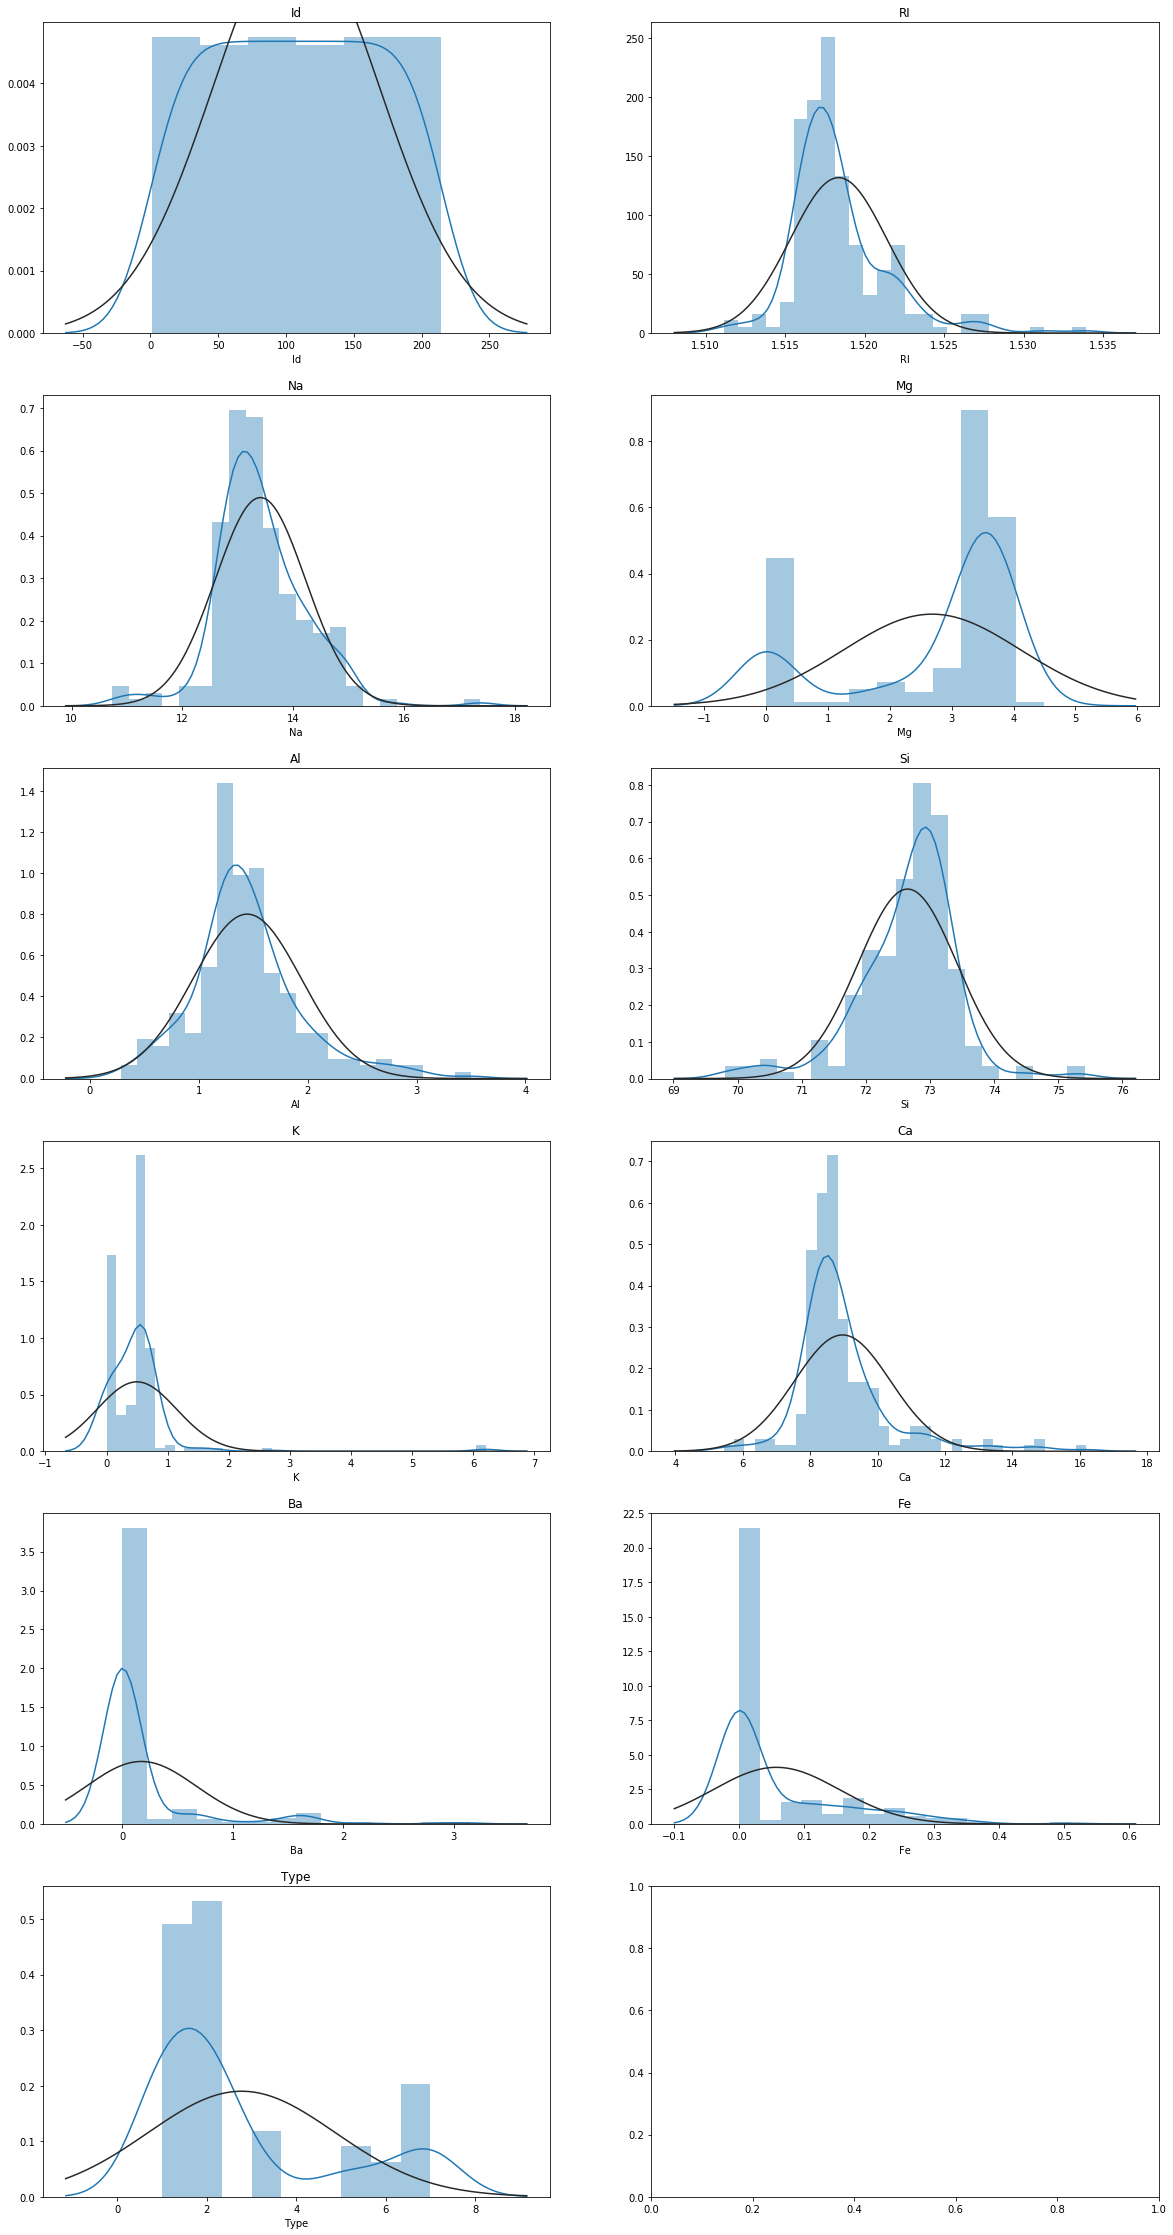

In [108]:
#Histograms of distributions for all variables    
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(20,40))
for i, ax in enumerate(axes.flatten()):
    if i == len(glass.columns):
        break
    sns.distplot(glass.iloc[:,i], ax=ax, fit=norm)
    ax.set_title(glass.columns[i])
    
#Calculate skewness
skness = skew(normalize(glass))
skw = pd.DataFrame({'variables': glass.columns, 'skewness': abs(skness)})
skw.sort_values('skewness')


In [124]:
pca = PCA(n_components=3)
pca.fit(normalize(glass.iloc[:,1:-1]))

print(pca.explained_variance_ratio_)  

[ 0.51576126  0.27928651  0.1158533 ]
